In [1]:
import numpy
import nibabel as nib
import os
import matplotlib.pyplot as plt

# Result display - Theory

This section will guide you through proper image result display/ </br>
For the purpose of QSM testing we have 3 important steps to show </br>
I. Phase unwrapping: Complex MR signal is composed of Magnitude and Phase. MR phase is proportional to local deviations in the static magnetic field (Hz). Measured phase is a projection of the true phase into the 2pi range. 



In [2]:
# Selecting slice 
def display_nifti_slice(filepath, slice_number, cbr_title, inf_limit = None, sup_limit = None, xlim = None, ylim = None, ):
    # Load the NIfTI image
    img = nib.load(filepath)
    
    # Get the data as a numpy array
    img_data = img.get_fdata()
    
    # Check if the specified slice number is within bounds
    if slice_number < 0 or slice_number >= img_data.shape[2]:
        print("Slice number out of range. Please select a valid slice number.")
        return

    # Select the specified slice
    slice_data = img_data[:, :, slice_number]
    
    # Display the slice
    plt.figure(figsize=(6, 6))
    if inf_limit is None and sup_limit is None:
        plt.imshow(slice_data.T, cmap='gray', origin='lower')
    else:
        plt.imshow(slice_data.T, cmap='gray', origin='lower', vmin=inf_limit, vmax=sup_limit)
   
    cbr= plt.colorbar()
    cbr.set_label(cbr_title, rotation = 0, labelpad = 15, fontsize = 15)
    slice_number += 1
    plt.title(f'Slice {slice_number}')

    if xlim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.xlim(xlim)

    if ylim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.ylim(ylim)

    plt.axis('off')
    plt.show()



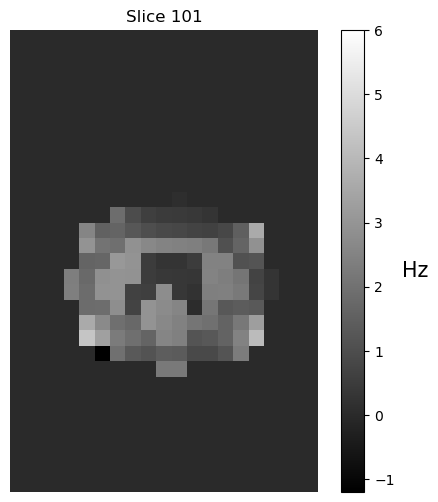

In [8]:
# Select the parameters
# Phase unwrapping:
first_golden_path = "output/1.phase_unwrap_sepia/trial3_nogauss_sc_mask/Sepia_fieldmap.nii.gz"
first_pathX = "output/1.phase_unwrap_sepia/trialX_opt_w/GRAPHCUT/Sepia_fieldmap.nii.gz"
first_pathY = "output/1.phase_unwrap_sepia/trialY_nonlinearfit/Laplacian_MEDI/Sepia_fieldmap.nii.gz"

# Background field removal
second_golden_path = "output/2.bgfr_sepia/trial6_nogauss_dilaSC_LBV/Sepia_localfield.nii.gz"
second_pathX = "output/2.bgfr_sepia/trialX/with_MEDI_RG_FM/Sepia_localfield.nii.gz"

# Dipole inversion
third_golden_path = ""
third_pathX = ""
third_pathy = ""

# Defining square focusing on Spinal Cord
xlim = (40,60)
ylim = (10,40)
# To select the titl of the colorbar remember:
# For Fieldmaps and Local field the unit should be Hz
# For QSM maps it should be in PPM
cbr_name = 'Hz'

############ ########## # ######### # ### ## ##  ##########################################################
display_nifti_slice(second_golden_path, 100, cbr_name, inf_limit = -1.2, sup_limit = 6, xlim = xlim, ylim = ylim)
# The value of the slice number is 1 less than what you see in ITK-snap